<a href="https://colab.research.google.com/github/Ashwath26112006/AI-ML_Task2_MozillaFirefox/blob/main/AI_ML_task2_Sequential_Image_Classification_Model_MozillaFirefox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 45ms/step - accuracy: 0.3606 - loss: 1.7274 - val_accuracy: 0.5598 - val_loss: 1.2253
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.5793 - loss: 1.1857 - val_accuracy: 0.6144 - val_loss: 1.0739
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.6433 - loss: 1.0086 - val_accuracy: 0.6542 - val_loss: 0.9891
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.6850 - loss: 0.8988 - val_accuracy: 0.6797 - val_loss: 0.9238
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.7059 - loss: 0.8327 - val_accuracy: 0.6824 - val_loss: 0.9251
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7327 - loss: 0.7654 - val_accuracy: 0.6926 - val_loss: 0.8987
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.7518 - loss: 0.7085 - val_accuracy: 0.7067 - val_loss: 0.8572
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 44ms/step - accuracy: 0.7672 -

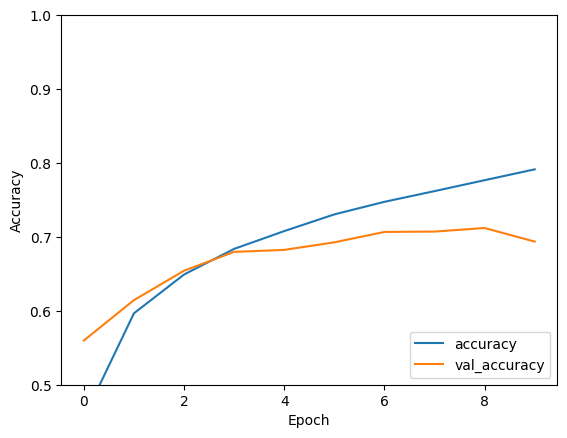

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io

# Load and prepare the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class labels to categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Function to predict and display an image
def predict_image(model, image):
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']
    prediction = model.predict(image[None, ...])
    predicted_class = class_names[np.argmax(prediction[0])]

    plt.imshow(image)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

    return predicted_class

# Upload and predict on a custom image
uploaded = files.upload()
for fn in uploaded.keys():
    image = plt.imread(io.BytesIO(uploaded[fn]))
    image_resized = tf.image.resize(image, (32, 32))
    predicted_class = predict_image(model, image_resized)
    print(f'Predicted class: {predicted_class}')
